# Принятие решений в бизнесе

## Данные.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.set_axis(['transaction_id', 'visitor_id','date', 'revenue', 'group'],axis = 'columns', inplace = True)

In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
print('Дубликатов: ', hypothesis.duplicated().sum())

Дубликатов:  0


In [14]:
print('Дубликатов: ', orders.duplicated().sum())

Дубликатов:  0


In [15]:
print('Дубликатов: ', visitors.duplicated().sum())

Дубликатов:  0


## Приоритизация гипотез.

### Фреймворк ICE для приоритизации гипотез

In [16]:
hypothesis['ICE'] = (hypothesis['impact']* hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективны гипотезы 8, 0, 7 и 11.

### Фреймворк RICE для приоритизации гипотез

In [17]:
hypothesis['RICE'] = (hypothesis['reach'] *hypothesis['impact']* hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Гипотезы 7, 2, 0 и 6. Их параметр Reach выше, чем у других. 

In [18]:
display(hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by=['ICE', 'RICE'], ascending=False). \
       reset_index(drop=True).style.\
       format({'ICE' : '{:.2f}', 'RICE' : '{:.2f}'}).\
       bar(subset = ['ICE', 'RICE'],
           align='mid',
           color=['pink'],
           vmax=hypothesis['RICE'].max()).\
        set_properties(**{'text-aling' : 'center'}, subset = ['ICE', 'RICE']))

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


По фреймворку ICE наибольшую оценку имели гипотезы 8,0,7 и 11. После применения фреймворка RICE приоритеты изменились на гипотезы 7,2,0 и 6. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0 и 6.

## Проанализируйте A/B-тест

### График кумулятивной выручки по группам

Создаем массив уникальных пар значений дат и групп теста.

In [19]:
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

Агрегированные кумулятивные по дням данные о заказах:

In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)

Агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Единая таблица:

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Разбивка на гпуппы А и В.

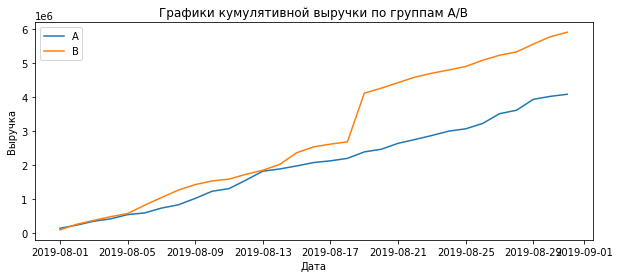

In [24]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако график группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Их нужно будет удалить.

### График кумулятивной выручки среднего чека по группам. 

Разделим  выручку на число заказов:

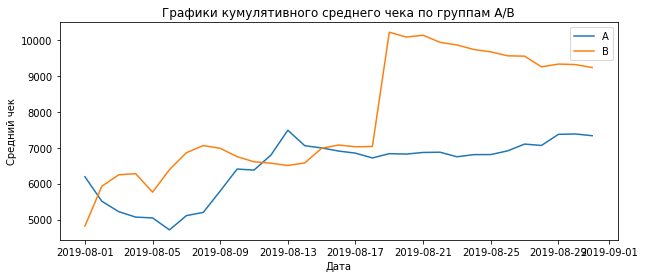

In [25]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

В группу B попали крупные заказы (резкий всплеск на графике).

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0.5, 0, 'Дата')

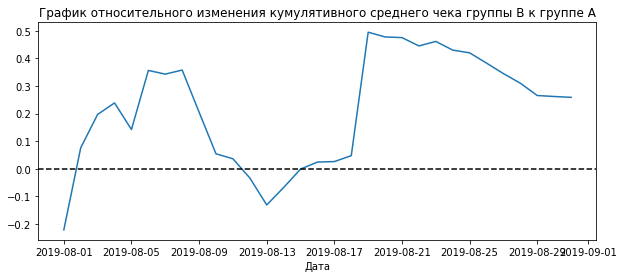

In [26]:
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB'])/(mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

Колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей

### График кумулятивной конверсии по группам

Разделим количество заказов на количество пользователей, совершивших заказ:

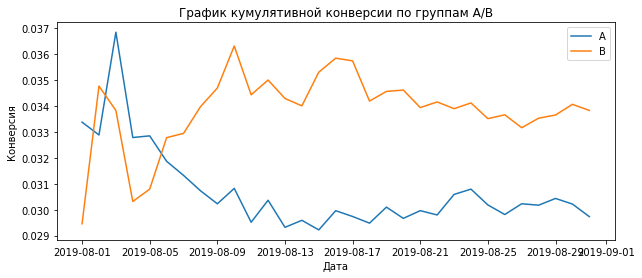

In [27]:
mergedCumulativeData['conversionA'] =  mergedCumulativeData['ordersA'] / mergedCumulativeData['visitorsA'] 
mergedCumulativeData['conversionB'] =  mergedCumulativeData['ordersB'] / mergedCumulativeData['visitorsB']
mergedCumulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['conversionA'], label='A')
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['conversionB'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

Группа В стабильно показывает конверсию больше, чем А.

### График относительного изменения кумулятивной конверсии группы B к группе A

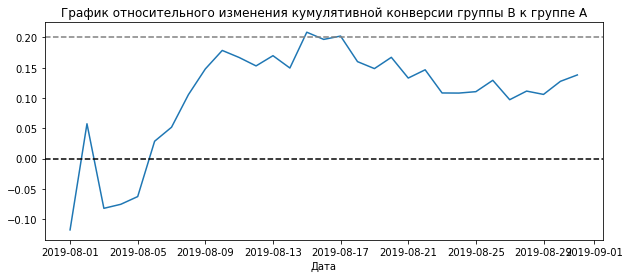

In [28]:
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeData['date'], ((mergedCumulativeData['conversionB']/mergedCumulativeData['conversionA'])-1))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

Конверсия в группе B стабильно лучше конверсии в группе A.

### Точечный график стоимостей заказов

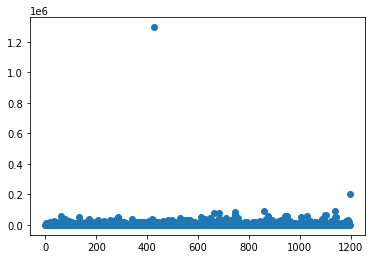

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

Есть немного дорогих заказов.

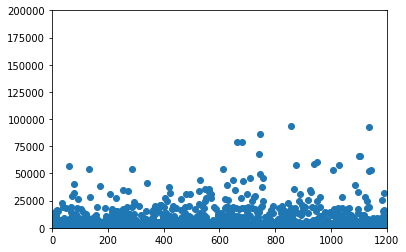

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.axis([0, 1200, 0, 200000])
plt.scatter(x_values, orders['revenue']) 

Судя по графикам, большая часть пользователей делает покупки суммой не больше 25-40 т.р

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [32]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 


      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи с 8, 9 и 11 заказами.

Построим гистрограмму распределения количества заказов на одного пользователя.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

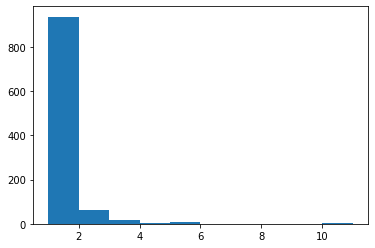

In [33]:
import matplotlib.pyplot as plt 
plt.hist(ordersByUsers['orders']) 

Большинство покупателей заказывали только один раз

Построим точечную диаграмму числа заказов на одного пользователя:

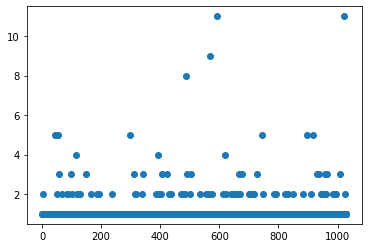

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Много пользователей с 2-4 заказами. Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.Разумно выбрать 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы.
* H0 - различий в конверсии между группами нет. 
* H1 - различия в конверсии между группами есть.

Для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [48]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (
    visitorsADaily.merge(
        visitorsBDaily, left_on='date', right_on='date', how='left'
    )
)

In [49]:
data.head(5)

,date,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост конверсии группы B по отношению к группе A: 0.138


p-value меньше 0.05, значит нудевую гипотезу отвергаем. В конверсии  группами есть статистически значимые различия. Относительный прирост группы В к конверсии группы А равен 13.8%. 

###	Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

* H0 -  различий в среднем чеке между группами нет
* H1 альтернативная гипотеза: различия в среднем чеке между группами есть.

In [52]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительное изменение среднего чека в группе B по отношению группы A: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие среднего чека между сегментами 25.9 % это много.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 3 заказо или заказ на сумму больше 30 тыс руб.

In [54]:
max_orders = 3
max_revenue = 30000

In [55]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > max_orders]['visitor_id'],ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],],axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitor_id']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
57


Всего 57 аномальных пользователей.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B по отношению к группе A после очистки данных:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.018
Относительный прирост конверсии группы B по отношению к группе A после очистки данных:0.148


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В лучше сегмента А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [56]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))
            ]['revenue'],
        )[1]
    ))

print(
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[
            np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()- 1)) 

P-value: 0.958
-0.020


P-value увеличился, относительное изменение среднего чека в группе B по отношению группы A после очистки данных стало минимально.

Исходя из обнаруженных фактов, тест следует остановить и признать победу группы B. Продолжать смысла нет, потому что есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя. После очистки разница среднего чека стала минимальна.